In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.head(3)

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
0,10,70.3,213,582,6.0,7.05,36
1,13,61.0,91,132,8.2,48.52,100
2,12,56.7,453,716,8.7,20.66,67


In [5]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


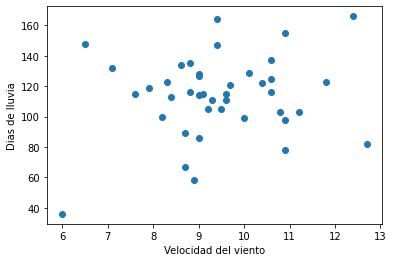

In [7]:
#verificar si estan correlacionas
plt.scatter(cont.Velocidad_viento, cont.Dias_Lluvia)
plt.xlabel('Velocidad del viento')
plt.ylabel('Dias de lluvia')
plt.show()

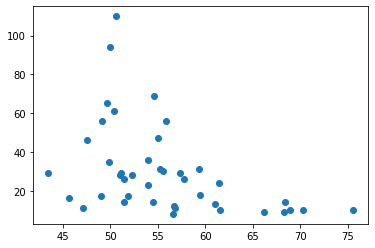

In [8]:
plt.scatter(cont.Temperatura, cont.Contaminacion_SO2)
plt.show()

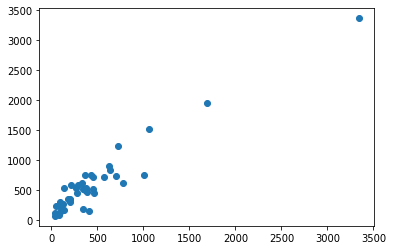

In [9]:
plt.scatter(cont.Fabricas, cont.Habitantes)
plt.show()

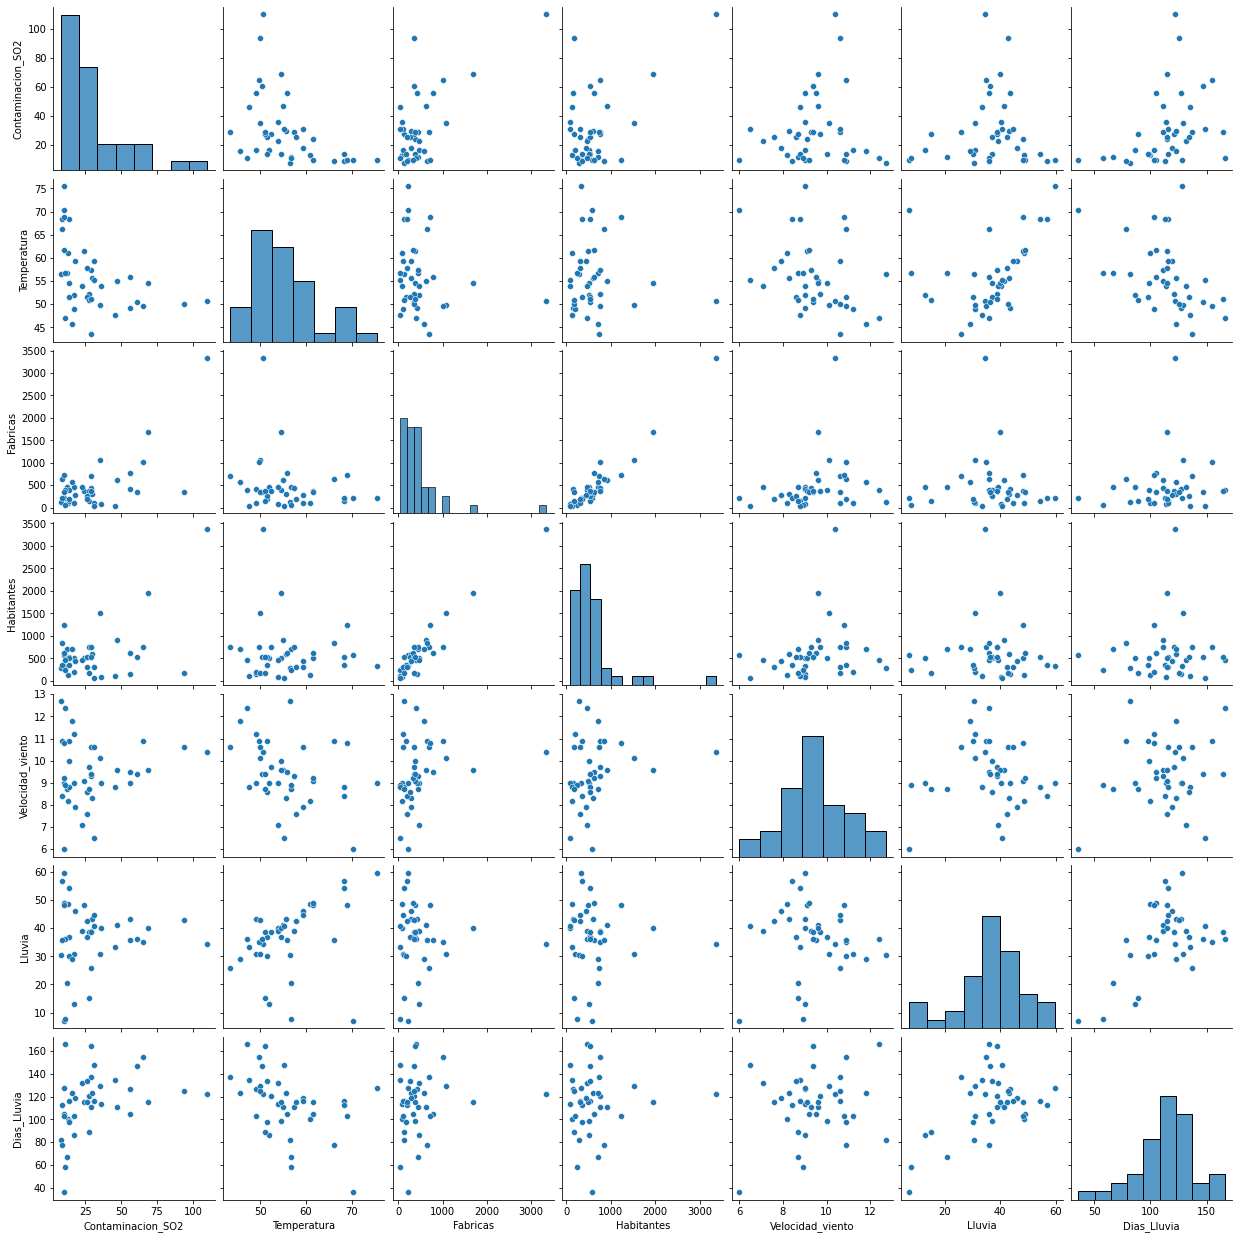

In [10]:
# Verficar la normalidad
sns.pairplot(cont)

Saca todas las graficas para ver las relaciones de todas las variables, asi podremos verificar si existe correlación. Tambien nor sirva para saber que tienen distribución normal.

In [12]:
# Prueba de normalidad
import numpy as np

data = np.random.normal(0, 1, 1000)

(array([  7.,  36.,  80., 153., 224., 229., 152.,  92.,  22.,   5.]),
 array([-3.01056256, -2.40447926, -1.79839596, -1.19231266, -0.58622936,
         0.01985395,  0.62593725,  1.23202055,  1.83810385,  2.44418715,
         3.05027045]),
 <a list of 10 Patch objects>)

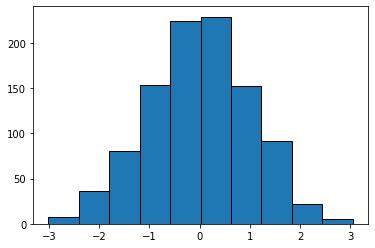

In [13]:
plt.hist(data, edgecolor='black')

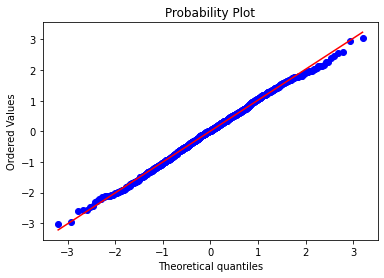

In [16]:
# Quantile-Quantile Normal (Grafica de los cuartiles)
import pylab
import scipy.stats as stats

stats.probplot(data, dist='norm', plot=pylab)
pylab.show()

Si van oscilando de la linea roja signfica que tiene distribución normal.

In [24]:
# Otra forma de ver la normalidad Shapiro
from scipy.stats import shapiro

estad, p_value = shapiro(data)
# p_value > 0.05 => normalidad
print('Estadistico= %.3f, p_value=%.3f' % (estad, p_value))

Estadistico= 0.998, p_value=0.219


## Aplicacion con datos

(array([ 2.,  1.,  2.,  4., 12.,  7.,  5.,  5.,  1.,  2.]),
 array([ 6.  ,  6.67,  7.34,  8.01,  8.68,  9.35, 10.02, 10.69, 11.36,
        12.03, 12.7 ]),
 <a list of 10 Patch objects>)

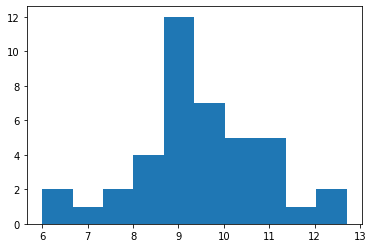

In [20]:
plt.hist(cont.Velocidad_viento)

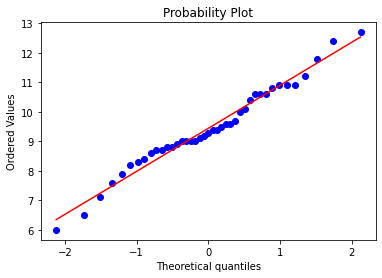

In [21]:
# Quantile-Quantile Normal (Grafica de los cuartiles)
import pylab
import scipy.stats as stats

stats.probplot(cont.Velocidad_viento, dist='norm', plot=pylab)
pylab.show()

In [23]:
# Otra forma de ver la normalidad Shapiro
from scipy.stats import shapiro

estad, p_value = shapiro(cont.Velocidad_viento)
# p_value > 0.05 => normalidad
print('Estadistico= %.3f, p_value=%.3f' % (estad, p_value))

Estadistico= 0.981, p_value=0.697


### Otro ejemplo en que no es normal

(array([18.,  6.,  8.,  2.,  2.,  3.,  0.,  0.,  1.,  1.]),
 array([  8. ,  18.2,  28.4,  38.6,  48.8,  59. ,  69.2,  79.4,  89.6,
         99.8, 110. ]),
 <a list of 10 Patch objects>)

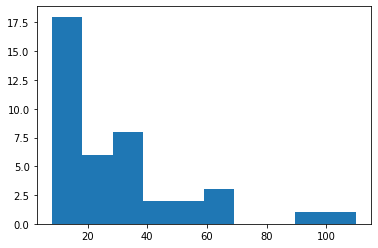

In [25]:
plt.hist(cont.Contaminacion_SO2)

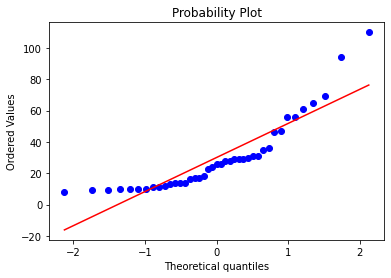

In [26]:
# Quantile-Quantile Normal (Grafica de los cuartiles)
import pylab
import scipy.stats as stats

stats.probplot(cont.Contaminacion_SO2, dist='norm', plot=pylab)
pylab.show()

In [29]:
# Otra forma de ver la normalidad Shapiro
from scipy.stats import shapiro

estad, p_value = shapiro(cont.Contaminacion_SO2)
# p_value > 0.05 => normalidad
print('Estadistico= %.3f, p_value=%.6f' % (estad, p_value))

Estadistico= 0.812, p_value=0.000010


In [30]:
# Usaremos el coeficiente de esperman porque no todos los datos son normales

cont_corr = cont.corr(method='spearman')
cont_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.538831,0.264051,0.089470,0.047309,-0.002616,0.517709
Temperatura,-0.538831,1.000000,-0.225629,0.031362,-0.398282,0.498650,-0.505730
Fabricas,0.264051,-0.225629,1.000000,0.822997,0.394193,-0.151568,0.145266
Habitantes,0.089470,0.031362,0.822997,1.000000,0.337431,-0.130314,0.010108
Velocidad_viento,0.047309,-0.398282,0.394193,0.337431,1.000000,-0.256605,0.034454
Lluvia,-0.002616,0.498650,-0.151568,-0.130314,-0.256605,1.000000,0.242342
Dias_Lluvia,0.517709,-0.505730,0.145266,0.010108,0.034454,0.242342,1.000000


1.000  alta correlación

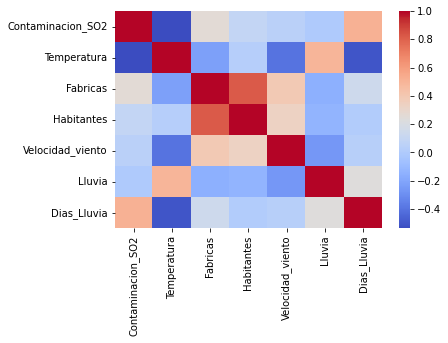

In [33]:
# Cuando son muchos datos
sns.heatmap(cont_corr,
            xticklabels=cont_corr.columns,
            yticklabels=cont_corr.columns,
            cmap = 'coolwarm')

Rojos-Correlacion positiva \
Azules- Correlacion negativa

In [7]:
# Como determinar significancias
# Que las correlaciones no sean azarosas

# Instlar paquete
#!pip install pingouin

In [9]:
import pingouin as pg 
corr = pg.pairwise_corr(cont, method='spearman')

Doc: https://bit.ly/39ik21W

In [11]:
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

,X,Y,n,r,p-unc
11,Fabricas,Habitantes,41,0.822997,4.020507e-11
0,Contaminacion_SO2,Temperatura,41,-0.538831,2.784226e-04
5,Contaminacion_SO2,Dias_Lluvia,41,0.517709,5.270914e-04
10,Temperatura,Dias_Lluvia,41,-0.505730,7.434618e-04
9,Temperatura,Lluvia,41,0.498650,9.057623e-04
8,Temperatura,Velocidad_viento,41,-0.398282,9.906609e-03
12,Fabricas,Velocidad_viento,41,0.394193,1.076594e-02
15,Habitantes,Velocidad_viento,41,0.337431,3.096515e-02
1,Contaminacion_SO2,Fabricas,41,0.264051,9.527256e-02
18,Velocidad_viento,Lluvia,41,-0.256605,1.053381e-01


Mayor a .05 son azarosos